# 1.このSprintについて
■Sprintの目的  
・機械学習スクラッチの準備をする  
■どのように学ぶか  　
今後の機械学習スクラッチ課題で作成するモデルを、scikit-learnを用いて一度動かしておきます。これまでの復習を兼ねたスクラッチ課題の準備です。  　　

2.スクラッチ  
このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。  

■スクラッチの意義  

ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。  

スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。  

以下のような効果を狙っています。  

・新たな手法に出会った時に理論・数式を理解しやすくする  
・ライブラリを使う上での曖昧さを減らす  
・既存の実装を読みやすくする  

# 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。  

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    import numpy as np
    
    per = len(y) #サンプル数(インデックス数)を取得
    split_size = int(per*train_size) #train_sizeでサンプル数を分ける
    shuffle_index = np.random.permutation(per) #sampleのインデックスをshuffleして変数に格納
    #インデックスをshuffle_index、split_sizeでスライスしていく
    X_train = X[shuffle_index][:split_size]
    X_test = X[shuffle_index][split_size:]
    y_train = y[shuffle_index][:split_size]
    y_test = y[shuffle_index][split_size:]
    
    return X_train, X_test, y_train, y_test

## 【確認】

In [3]:
import numpy as np
import pandas as pd


X = np.arange(20)# 0～19
y = np.random.randint(0, 2, size=20)#0,1をランダムに20個
print("Xは{}".format(X))
print("yは{}".format(y))
# X_df = pd.DataFrame(X)
# y_df = pd.DataFrame(y)
# display(pd.concat([X_df, y_df],axis=1))
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, 0.8)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


Xは[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
yは[1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1]
[ 7  0  4 19 14 11  9  8  6 15  3 10  5 17 12  1]
[0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0]
[ 2 18 13 16]
[1 0 0 0]


### ランダムに20:80で分割されているのが確認できた。

# 【問題2】 分類問題を解くコードの作成
## 3.scikit-learnを用いて機械学習を行うコードを作成  

scikit-learnを使ったコードを作成していきます。  
検証用データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。  

### ■分類問題  
分類は3種類の手法をスクラッチします。  

・ロジスティック回帰  
・SVM  
・決定木  
ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。  

・[sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)  
・[sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)  
・[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  
データセットは3種類用意します。  
1つ目は事前学習期間同様にirisデータセットです。  
[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)  
2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。  

・virgicolorとvirginica  

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。  特徴量が2つであるため可視化が容易です。  
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。  



#### ホールドアウト法	機械学習におけるデータのテスト方法の１つです。教師データ（訓練データ）を「学習用」「評価用」に6対4などに割合で2分割して、学習済みモデルの精度を測定します。

## iris_datasetをダウンロード

In [4]:
from sklearn.datasets import load_iris
iris_data = load_iris()

X_iris = pd.DataFrame(iris_data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_iris = pd.DataFrame(iris_data.target, columns=["Species"])
# 目的変数をvirgicolorとvirginicaにする
y_iris = y_iris[(y_iris["Species"] == 1) | (y_iris["Species"] == 2)] 
X_iris = X_iris.reset_index(drop=True)# indexを振りなおす
y_iris = y_iris.reset_index(drop=True)# indexを振りなおす


## シンプルデータセット1を作成

In [5]:
# シンプルデータセット１作成コード
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X_1 = np.concatenate((f0, f1))
y_1 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X_1 = X_1[random_index]
y_1 = y_1[random_index]

In [6]:
display(X_1.shape)
display(X_1[:10])
display(y_1.shape)
display(y_1[:10])

(500, 2)

array([[ 0.77238275, -2.29167329],
       [-0.59334945,  1.66788336],
       [-2.0764856 ,  0.48746845],
       [ 0.11922688,  3.62537974],
       [-3.13000578, -0.15673155],
       [-1.78109832,  1.22224904],
       [ 3.99770982,  1.25164011],
       [ 2.1560447 , -0.38582443],
       [ 1.94741552, -1.29638961],
       [ 1.58757396, -1.85989193]])

(500,)

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1])

## シンプルデータセット２作成

In [7]:
#シンプルデータセット２作成コード
X_2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y_2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
display(X_2.shape)
display(y_2.shape)

(40, 2)

(40,)

## 各データセットにtrain_test_splitを掛ける

In [9]:
#iris_datasetをsplit
X_train_iris, X_test_iris, y_train_iris, y_test_iris = scratch_train_test_split(X_iris.values, y_iris.values, 0.8)
#シンプルデータセット１をsplit
X_train_1, X_test_1, y_train_1, y_test_1 = scratch_train_test_split(X_1, y_1, 0.8)
#シンプルデータセット２をsplit
X_train_2, X_test_2, y_train_2, y_test_2 = scratch_train_test_split(X_2, y_2, 0.8)

###  4つの指標を出力する関数を作成

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import HTML

In [11]:
#iris
def index_4_iris(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_iris, predict_train)*100],
            "Precision" : [precision_score(y_test_iris, predict_train)*100],
            "Recall" : [recall_score(y_test_iris, predict_train)*100],
            "F1" : [f1_score(y_test_iris, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_iris, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [12]:
# シンプルデータセット１
def index_4_1(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_1, predict_train)*100],
            "Precision" : [precision_score(y_test_1, predict_train)*100],
            "Recall" : [recall_score(y_test_1, predict_train)*100],
            "F1" : [f1_score(y_test_1, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_1, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [13]:
#　シンプルデータセット２
def index_4_2(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_2, predict_train)*100],
            "Precision" : [precision_score(y_test_2, predict_train)*100],
            "Recall" : [recall_score(y_test_2, predict_train)*100],
            "F1" : [f1_score(y_test_2, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_2, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

## ロジスティック回帰

### iris_dataset

In [14]:
from sklearn import linear_model

# 学習
clf_sgdc = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, loss='log')
clf_sgdc.fit(X_train_iris, y_train_iris)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
#　推定
predict_sgdc_iris = clf_sgdc.predict(X_test_iris)
sgdc_iris = index_4_iris(predict_sgdc_iris, 'iris')
sgdc_iris

,Accuracy,Precision,Recall,F1,ConfusionMatrix
iris,100.0,100.0,100.0,1.0,"[[10, 0], [0, 10]]"


### シンプルデータセット１

In [16]:
# 学習
clf_sgdc_1 = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, loss='log')
clf_sgdc_1.fit(X_train_1, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
#　推定
predict_sgdc_1 = clf_sgdc_1.predict(X_test_1)
sgdc_1 = index_4_1(predict_sgdc_1, 'simple_1')
sgdc_1

,Accuracy,Precision,Recall,F1,ConfusionMatrix
simple_1,100.0,100.0,100.0,1.0,"[[44, 0], [0, 56]]"


### シンプルデータセット2

In [18]:
# 学習
clf_sgdc_2 = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, loss='log')
clf_sgdc_2.fit(X_train_2, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
#　推定
predict_sgdc_2 = clf_sgdc_2.predict(X_test_2)
sgdc_2 = index_4_2(predict_sgdc_2, 'simple2')
sgdc_2

,Accuracy,Precision,Recall,F1,ConfusionMatrix
simple2,50.0,33.333333,33.333333,0.333333,"[[3, 2], [2, 1]]"


### 比較

In [20]:
pd.concat([sgdc_iris,sgdc_1,sgdc_2])

,Accuracy,Precision,Recall,F1,ConfusionMatrix
iris,100.0,100.000000,100.000000,1.000000,"[[10, 0], [0, 10]]"
simple_1,100.0,100.000000,100.000000,1.000000,"[[44, 0], [0, 56]]"
simple2,50.0,33.333333,33.333333,0.333333,"[[3, 2], [2, 1]]"


## SVM

### iris_dataset

In [21]:
# 学習
from sklearn.svm import SVC
clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train_iris, y_train_iris)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# 推定
predct_svc_iris = clf_svc.predict(X_test_iris)
svc_iris = index_4_iris(predct_svc_iris, 'svc_iris')
svc_iris

,Accuracy,Precision,Recall,F1,ConfusionMatrix
svc_iris,100.0,100.0,100.0,1.0,"[[10, 0], [0, 10]]"


### シンプルデータセット１

In [23]:
#学習
clf_svc_1 = SVC(gamma='auto')
clf_svc_1.fit(X_train_1, y_train_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# 推定
predct_svc_1 = clf_svc_1.predict(X_test_1)
svc_1 = index_4_1(predct_svc_1, 'svc_iris')
svc_1

,Accuracy,Precision,Recall,F1,ConfusionMatrix
svc_iris,100.0,100.0,100.0,1.0,"[[44, 0], [0, 56]]"


### シンプルデータセット２

In [25]:
#学習
clf_svc_2 = SVC(gamma='auto')
clf_svc_2.fit(X_train_2, y_train_2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# 推定
predct_svc_2 = clf_svc_2.predict(X_test_2)
svc_2 = index_4_2(predct_svc_2, 'svc_iris')
svc_2

,Accuracy,Precision,Recall,F1,ConfusionMatrix
svc_iris,62.5,50.0,100.0,0.666667,"[[2, 3], [0, 3]]"


### 比較

In [27]:
pd.concat([svc_iris,svc_1,svc_2])

,Accuracy,Precision,Recall,F1,ConfusionMatrix
svc_iris,100.0,100.0,100.0,1.000000,"[[10, 0], [0, 10]]"
svc_iris,100.0,100.0,100.0,1.000000,"[[44, 0], [0, 56]]"
svc_iris,62.5,50.0,100.0,0.666667,"[[2, 3], [0, 3]]"


## DecisionTree

### iris_dataset

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#学習
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [29]:
#推定
predct_dt_iris = clf_dt.predict(X_test_iris)
dt_iris = index_4_iris(predct_dt_iris, 'dt_iris')
dt_iris

,Accuracy,Precision,Recall,F1,ConfusionMatrix
dt_iris,100.0,100.0,100.0,1.0,"[[10, 0], [0, 10]]"


### simple_1

In [30]:
#学習
clf_dt_1 = DecisionTreeClassifier(random_state=0)
clf_dt_1.fit(X_train_1, y_train_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
#推定
predct_dt_1 = clf_dt_1.predict(X_test_1)
dt_1 = index_4_1(predct_dt_1, 'dt_1')
dt_1

,Accuracy,Precision,Recall,F1,ConfusionMatrix
dt_1,100.0,100.0,100.0,1.0,"[[44, 0], [0, 56]]"


### simple_2

In [32]:
#学習
clf_dt_2 = DecisionTreeClassifier(random_state=0)
clf_dt_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [33]:
#推定
predct_dt_2 = clf_dt_2.predict(X_test_2)
dt_2 = index_4_2(predct_dt_2, 'dt_2')
dt_2

,Accuracy,Precision,Recall,F1,ConfusionMatrix
dt_2,75.0,60.0,100.0,0.75,"[[3, 2], [0, 3]]"


### 比較

In [34]:
pd.concat([dt_iris, dt_1, dt_2])

,Accuracy,Precision,Recall,F1,ConfusionMatrix
dt_iris,100.0,100.0,100.0,1.00,"[[10, 0], [0, 10]]"
dt_1,100.0,100.0,100.0,1.00,"[[44, 0], [0, 56]]"
dt_2,75.0,60.0,100.0,0.75,"[[3, 2], [0, 3]]"


# 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。  
■回帰問題  
回帰は1種類をスクラッチします。  

・線形回帰  
線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。  

[sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)  

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。  

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

## dataをダウンロード

In [37]:
pd.set_option('display.max_columns', 200)# 表示する列を省略しない

In [40]:
df = pd.read_csv('train.csv')
display(df.head())
X_sgdr = df.loc[:, ["GrLivArea", "YearBuilt"]]
y_sgdr = df['SalePrice']
display(X_sgdr.shape)
display(y_sgdr.shape)
display(X_sgdr.columns)
display(y_sgdr.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 2)

(1460,)

Index(['GrLivArea', 'YearBuilt'], dtype='object')

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## train_test_split

In [44]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X_sgdr.values, y_sgdr.values, 0.8)

In [72]:
X_test[:, 0]

array([1253, 1661,  720, 2198, 1291, 2515, 1687, 1472, 1709, 1629, 1250,
       2112, 1976, 1232, 1203,  912, 1484, 2234, 1504, 1824,  833,  858,
       2002, 1212, 1746, 1489, 1919, 1208, 1771, 2620, 1694, 1224,  936,
       2144, 1600, 1529, 1347, 1041, 2207, 1224, 1248, 2110, 1067, 1224,
       1218,  936, 1368, 1501, 2113,  854, 1466, 1983, 1092, 1964,  864,
       1625, 1283, 1980, 1728, 1479, 1069, 1572, 1338, 1484, 2295, 1472,
       1430, 2345,  886, 1419, 1959, 1961, 1344, 1183, 1098, 1472, 1920,
       1470, 1337, 2034,  784, 1986, 1796, 1441, 1550,  944, 1766, 2046,
       1574, 1509, 1704,  999, 1135, 1053,  981,  892, 1603, 1236, 1846,
       1184, 2630, 1252, 1199, 1348, 2078, 1733, 1479, 1530, 1121, 1922,
       1671, 1258, 1471, 1647,  816, 1912, 1644, 1131, 2418, 1008, 2236,
        773, 1768, 1414, 1664, 1582, 1714, 1416,  845, 1367, 1262, 1707,
       1464,  708,  965, 1437, 2727, 1302, 1114,  960, 1728, 1130, 1268,
       1500, 1721,  616, 1230, 1702, 1200, 2392, 17

## 学習

In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# 学習
clf_sgdr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf_sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

## 推定

In [60]:
# 推定
predict_sgdr = clf_sgdr.predict(X_test)

MSE = mean_squared_error(y_test, predict_sgdr)
print("MSE：{}".format(MSE))

MSE：5.464580055178017e+30


MSE : 5.464580055178017e+30


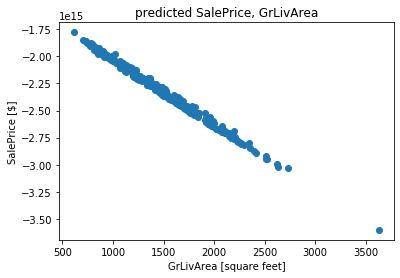

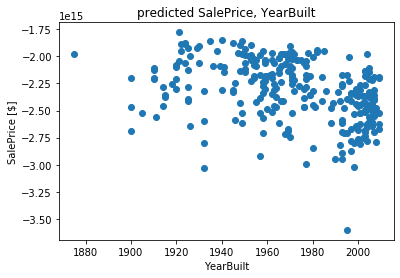

In [74]:
print("MSE : {}".format(mean_squared_error(y_test, predict_sgdr)))

plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:,0], predict_sgdr)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], predict_sgdr)
plt.show()